Cluster 1 IDs:
['GGMO', 'BQHT', 'UPGW', 'FPIT', 'XQJO', 'OUWM', 'RCEH', 'YLTR', 'UREH', 'TEYQ', 'ACGN', 'WOKD', 'FQMM', 'WMKQ', 'EUDK', 'UFNF', 'DXJP', 'ANAV', 'JBXP', 'WTIY', 'RRSK', 'IIMV', 'DRDQ', 'YYTZ', 'PGJC', 'GZTO', 'FXXV', 'FJEB', 'FWDA', 'BWNF', 'DBQH', 'VPQA', 'WJJU', 'VKPD', 'RTBV', 'IQMQ', 'HIXM', 'FIVC', 'QQTV', 'YFDE', 'ODJH', 'URXR', 'MTXB', 'FGTV', 'NUAO', 'SSNK', 'CBDG', 'SSXP', 'QHTL', 'QMGI', 'EGRU', 'AAAA', 'LCPU', 'XPRU', 'CGWN', 'UING', 'BPPX', 'YNRZ', 'VAGY', 'OWHE', 'RGYJ', 'MPOB', 'HCWV', 'WFKT', 'AOXY', 'LVEY', 'VNWM', 'OVOW', 'FVZI', 'JKOY', 'FQGS', 'KRKM', 'QZPJ', 'QVFJ', 'IXRA', 'OGBK', 'MHGM', 'YJKM', 'XBCP', 'EODT', 'HTLW', 'RTUG', 'PGBB', 'ONVA', 'IHGX', 'HASK', 'HRGF', 'WRED', 'HDNQ', 'ZDGH', 'JYVB', 'FMRE', 'VCVG', 'UVRZ', 'JVRV', 'MRPD', 'LAWW', 'FAFH', 'SGLD', 'VJGB', 'CXQX', 'DIJR', 'KSQU', 'CPSL', 'CXIJ']
Count: 105

Cluster 2 IDs:
['YPQL', 'LQKJ', 'GGWU', 'TYJR', 'NGVO', 'FMKJ', 'BFFT', 'TRUK', 'XKAL', 'ZTAL', 'EMBJ', 'SIUT', 'GCIV', 'UICN', 'TWB

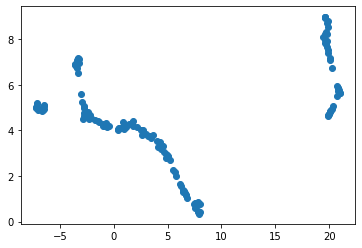

In [121]:
import matplotlib.pyplot as plt
import umap.umap_ as umap
import pandas as pd
import numpy as np
import glob
import os


def main():
    count = 0
    count2 = 0
    feature_list = []
    subject_list = []
    cluster1 = []
    cluster2 = []

    directoryPath = '/Users/imyint/Desktop/Maze-Navigation/Parsed_Data/'

    for file_name in glob.glob(directoryPath + '*.csv'):
        df = pd.read_csv(file_name)


        # read in the data on X and Z position plus the rotation
        feature = list(df['posX'].values[0:30000:30000])
        feature2 = list(df['posZ'].values[0:30000:30000])
        feature3 = list(df['rotX'].values[0:30000:30000])
        feature4 = list(df['rotY'].values[0:30000:30000])
        feature5 = list(df['rotZ'].values[0:30000:30000])

        feature.extend(feature2)
        feature.extend(feature3)
        feature.extend(feature4)
        feature.extend(feature5)
         

        # Select the data with 5 frames; the other subjects not with 5 frames are not considered
        if len(feature) == 5:
            feature_list.append(feature)
            # Each csv file is named with 4 letters, so take the 4 letters as their names.
            subject_list.append(file_name[50:54])
            

    #Set seed so plot remains the same from run to run
    standard_embedding = umap.UMAP(random_state = 42).fit_transform(feature_list)
    umapDF = pd.DataFrame(standard_embedding)
    

    # Split the plot in half; points to the left of 10 are Cluster 1 and points to the right are Cluster 2
    for i in range(len(standard_embedding)):
        if standard_embedding[i][0] > 10 :
            cluster2.append(subject_list[i])
            count2 +=1
        else:
            cluster1.append(subject_list[i])
            count +=1
            
   
     
    print('Cluster 1 IDs:')
    print(cluster1)
    print('Count:', count)
    print()
    print('Cluster 2 IDs:')
    print(cluster2)
    print('Count:', count2)

    # display the scatter plot
    plt.scatter(umapDF[0], umapDF[1], alpha=1)
    plt.show()


main()

Cluster 1 IDs:
['GGMO', 'BQHT', 'UPGW', 'FPIT', 'XQJO', 'OUWM', 'RCEH', 'YLTR', 'UREH', 'TEYQ', 'ACGN', 'WOKD', 'FQMM', 'WMKQ', 'EUDK', 'UFNF', 'DXJP', 'ANAV', 'JBXP', 'WTIY', 'RRSK', 'IIMV', 'DRDQ', 'YYTZ', 'PGJC', 'GZTO', 'FXXV', 'FJEB', 'FWDA', 'BWNF', 'DBQH', 'VPQA', 'WJJU', 'VKPD', 'RTBV', 'IQMQ', 'HIXM', 'FIVC', 'QQTV', 'YFDE', 'ODJH', 'URXR', 'MTXB', 'FGTV', 'NUAO', 'SSNK', 'CBDG', 'SSXP', 'QHTL', 'QMGI', 'EGRU', 'AAAA', 'LCPU', 'XPRU', 'CGWN', 'UING', 'BPPX', 'YNRZ', 'VAGY', 'OWHE', 'RGYJ', 'MPOB', 'HCWV', 'WFKT', 'AOXY', 'LVEY', 'VNWM', 'OVOW', 'FVZI', 'JKOY', 'FQGS', 'KRKM', 'QZPJ', 'QVFJ', 'IXRA', 'OGBK', 'MHGM', 'YJKM', 'XBCP', 'EODT', 'HTLW', 'RTUG', 'PGBB', 'ONVA', 'IHGX', 'HASK', 'HRGF', 'WRED', 'HDNQ', 'ZDGH', 'JYVB', 'FMRE', 'VCVG', 'UVRZ', 'JVRV', 'MRPD', 'LAWW', 'FAFH', 'SGLD', 'VJGB', 'CXQX', 'DIJR', 'KSQU', 'CPSL', 'CXIJ']
Count: 105

Cluster 2 IDs:
['YPQL', 'LQKJ', 'GGWU', 'TYJR', 'NGVO', 'FMKJ', 'BFFT', 'TRUK', 'XKAL', 'ZTAL', 'EMBJ', 'SIUT', 'GCIV', 'UICN', 'TWB

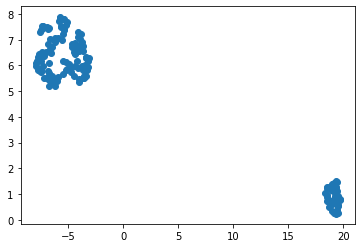

Centroid 1: [-5.54287137  6.4117782 ]

Centroid 2: [19.1029505   0.90106696]

Closest Point to Centroid 1: [-5.480129718780518, 6.180772304534912] , ACGN

Closest Point to Centroid 2: [19.146852493286133, 0.8216332793235779] , TRUK



In [149]:
import matplotlib.pyplot as plt
import umap.umap_ as umap
import pandas as pd
import numpy as np
import glob
import os


def main():
    count = 0
    count2 = 0
    feature_list = []
    subject_list = []
    cluster1 = []
    cluster2 = []
    cluster1_val = []
    cluster2_val = []

    directoryPath = '/Users/imyint/Desktop/Maze-Navigation/Parsed_Data/'

    for file_name in glob.glob(directoryPath + '*.csv'):
        df = pd.read_csv(file_name)

        # read in the data on X and Z position plus the Z rotation
        feature = list(df['posX'].values[0:30000:30000])
        feature2 = list(df['posZ'].values[0:30000:30000])
        feature3 = list(df['rotZ'].values[0:30000:30000])

        feature.extend(feature2)
        feature.extend(feature3)
 

        # Select the data with 3 frames; the other subjects not with 3 frames are not considered
        if len(feature) == 3:
            feature_list.append(feature)
            # Each csv file is named with 4 letters, so take the 4 letters as their names.
            subject_list.append(file_name[50:54])


    standard_embedding = umap.UMAP( n_neighbors=30, random_state = 42, min_dist=0.0).fit_transform(feature_list)
    umapDF = pd.DataFrame(standard_embedding)

    
    #Split the plot in half; points to the left are Cluster 1 and points to the right are Cluster 2
    for i in range(len(standard_embedding)):
        if standard_embedding[i][0] > 9 :
            #append subject ID
            cluster2.append(subject_list[i])
            #append data point
            cluster2_val.append(standard_embedding[i].tolist())
            count2 +=1
        else:
            cluster1.append(subject_list[i])
            cluster1_val.append(standard_embedding[i].tolist())
            count +=1
                       
     
    print('Cluster 1 IDs:')
    print(cluster1)
    print('Count:', count)
    print()
    print('Cluster 2 IDs:')
    print(cluster2)
    print('Count:', count2)

    # display the scatter plot
    plt.scatter(umapDF[0], umapDF[1], alpha=1)
    plt.show()
    
    
    #Centroids of each cluster
    centroid1 = np.mean(cluster1_val, axis=0)
    print('Centroid 1:', centroid1)
    print()
    
    centroid2 = np.mean(cluster2_val, axis = 0)
    print('Centroid 2:', centroid2)
    print()
    
    
    #Closest point to each centroid
    dist = lambda x, y: (x[0]-y[0])**2 + (x[1]-y[1])**2
    closest1 = min(cluster1_val, key=lambda co: dist(co, centroid1))
    closest2 = min(cluster2_val, key=lambda co: dist(co, centroid2))

    
    #IDs and data points of points closest to each centroid
    for i in range(len(standard_embedding)):
        if standard_embedding[i].tolist() == closest1:
            print('Closest Point to Centroid 1:', closest1, ',', subject_list[i])
            print()
        elif standard_embedding[i].tolist() == closest2:
            print('Closest Point to Centroid 2:', closest2, ',', subject_list[i])
            print()
        
        


main()


ACGN Path


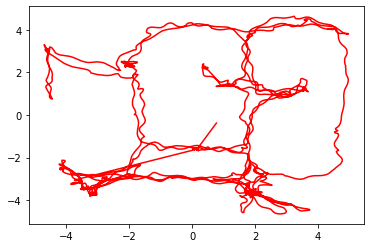

In [154]:
import matplotlib.pyplot as plt


def main():   
    df = pd.read_csv('/Users/imyint/Desktop/Maze-Navigation/Parsed_Data/ACGN.csv')
      
    feature = df['posX'].values
    feature2 = df['posZ'].values
    
    #Plot the X/Z position path of the nearest subject to centroid 1
    plt.plot(feature, feature2, color = 'red')
    print('ACGN Path')
    plt.show()

main()

TRUK Path


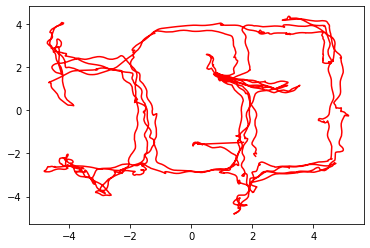

In [155]:
import matplotlib.pyplot as plt


def main():   
    df = pd.read_csv('/Users/imyint/Desktop/Maze-Navigation/Parsed_Data/TRUK.csv')
      
    feature = df['posX'].values
    feature2 = df['posZ'].values
    
    #Plot the X/Z position path of the nearest subject to centroid 2
    plt.plot(feature, feature2, color = 'red')
    print('TRUK Path')
    plt.show()

main()

Cluster 1


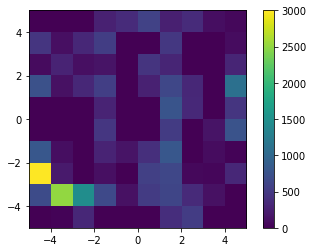

In [151]:
import matplotlib.pyplot as plt
import umap.umap_ as umap
import pandas as pd
import glob
import os
import plotly.graph_objects as go


def main():
    cluster1_ids = ['GGMO', 'BQHT', 'UPGW', 'FPIT', 'XQJO', 'OUWM', 'RCEH', 'YLTR', 'UREH', 'TEYQ', 'ACGN', 'WOKD', 'FQMM', 'WMKQ', 'EUDK', 'UFNF', 'DXJP', 'ANAV', 'JBXP', 'WTIY', 'RRSK', 'IIMV', 'DRDQ', 'YYTZ', 'PGJC', 'GZTO', 'FXXV', 'FJEB', 'FWDA', 'BWNF', 'DBQH', 'VPQA', 'WJJU', 'VKPD', 'RTBV', 'IQMQ', 'HIXM', 'FIVC', 'QQTV', 'YFDE', 'ODJH', 'URXR', 'MTXB', 'FGTV', 'NUAO', 'SSNK', 'CBDG', 'SSXP', 'QHTL', 'QMGI', 'EGRU', 'AAAA', 'LCPU', 'XPRU', 'CGWN', 'UING', 'BPPX', 'YNRZ', 'VAGY', 'OWHE', 'RGYJ', 'MPOB', 'HCWV', 'WFKT', 'AOXY', 'LVEY', 'VNWM', 'OVOW', 'FVZI', 'JKOY', 'FQGS', 'KRKM', 'QZPJ', 'QVFJ', 'IXRA', 'OGBK', 'MHGM', 'YJKM', 'XBCP', 'EODT', 'HTLW', 'RTUG', 'PGBB', 'ONVA', 'IHGX', 'HASK', 'HRGF', 'WRED', 'HDNQ', 'ZDGH', 'JYVB', 'FMRE', 'VCVG', 'UVRZ', 'JVRV', 'MRPD', 'LAWW', 'FAFH', 'SGLD', 'VJGB', 'CXQX', 'DIJR', 'KSQU', 'CPSL', 'CXIJ']

    directoryPath = '/Users/imyint/Desktop/Maze-Navigation/Parsed_Data/'
    
    for file in cluster1_ids:
        df = pd.read_csv(os.path.join(directoryPath, file + '.csv'))
            

    #Use histogram2d bins to count points in every grid space and create heatmap   
    feature = df['posX'].values
    feature2 = df['posZ'].values
    heatmap, xedges, yedges = np.histogram2d(feature, feature2, bins=10)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.clf()
    plt.imshow(heatmap.T, origin='lower', extent=[-5,5,-5,5], vmin = 0, vmax = 3000)
    plt.colorbar()
    
    #Uncomment plot to overlay graph on top of heatmap
    #plt.plot(feature, feature2, color = 'red')   
    print('Cluster 1')
    plt.show()


main()



Cluster 2


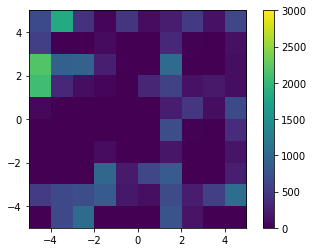

In [152]:
import matplotlib.pyplot as plt
import umap.umap_ as umap
import pandas as pd
import glob
import os


def main():
    cluster2_ids = ['YPQL', 'LQKJ', 'GGWU', 'TYJR', 'NGVO', 'FMKJ', 'BFFT', 'TRUK', 'XKAL', 'ZTAL', 'EMBJ', 'SIUT', 'GCIV', 'UICN', 'TWBG', 'CXYL', 'UZMT', 'BVEH', 'AELV', 'WONG', 'WGNY', 'TMPJ', 'BYOU', 'SFUG', 'MCCO', 'QMUX', 'TRTT', 'LMUU', 'FWVY', 'ITCT', 'BBHD', 'VZYX', 'BPUF', 'YPGZ', 'GJJJ', 'RVQO', 'RIKR', 'BFJK']

    directoryPath = '/Users/imyint/Desktop/Maze-Navigation/Parsed_Data/'
    
    for file in cluster2_ids:
        df = pd.read_csv(os.path.join(directoryPath, file + '.csv'))
  

    #Use histogram2d bins to count points in every grid space and create heatmap
    feature = df['posX'].values
    feature2 = df['posZ'].values
    heatmap, xedges, yedges = np.histogram2d(feature, feature2, bins=10)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.clf()
    plt.imshow(heatmap.T, origin='lower', extent=[-5,5,-5,5], vmin = 0, vmax = 3000)
    plt.colorbar()
    
    #Uncomment plot to overlay graph on top of heatmap
    #plt.plot(feature, feature2, color = 'red')
    print('Cluster 2')
    plt.show()


main()



In [175]:
import matplotlib.pyplot as plt
import umap.umap_ as umap
import pandas as pd
import glob
import os
import plotly.graph_objects as go


def main():
    MRT_scores_1 = []
    MRT_scores_2 = []
    cluster1_ids = ['GGMO', 'BQHT', 'UPGW', 'FPIT', 'XQJO', 'OUWM', 'RCEH', 'YLTR', 'UREH', 'TEYQ', 'ACGN', 'WOKD', 'FQMM', 'WMKQ', 'EUDK', 'UFNF', 'DXJP', 'ANAV', 'JBXP', 'WTIY', 'RRSK', 'IIMV', 'DRDQ', 'YYTZ', 'PGJC', 'GZTO', 'FXXV', 'FJEB', 'FWDA', 'BWNF', 'DBQH', 'VPQA', 'WJJU', 'VKPD', 'RTBV', 'IQMQ', 'HIXM', 'FIVC', 'QQTV', 'YFDE', 'ODJH', 'URXR', 'MTXB', 'FGTV', 'NUAO', 'SSNK', 'CBDG', 'SSXP', 'QHTL', 'QMGI', 'EGRU', 'AAAA', 'LCPU', 'XPRU', 'CGWN', 'UING', 'BPPX', 'YNRZ', 'VAGY', 'OWHE', 'RGYJ', 'MPOB', 'HCWV', 'WFKT', 'AOXY', 'LVEY', 'VNWM', 'OVOW', 'FVZI', 'JKOY', 'FQGS', 'KRKM', 'QZPJ', 'QVFJ', 'IXRA', 'OGBK', 'MHGM', 'YJKM', 'XBCP', 'EODT', 'HTLW', 'RTUG', 'PGBB', 'ONVA', 'IHGX', 'HASK', 'HRGF', 'WRED', 'HDNQ', 'ZDGH', 'JYVB', 'FMRE', 'VCVG', 'UVRZ', 'JVRV', 'MRPD', 'LAWW', 'FAFH', 'SGLD', 'VJGB', 'CXQX', 'DIJR', 'KSQU', 'CPSL', 'CXIJ']
    cluster2_ids = ['YPQL', 'LQKJ', 'GGWU', 'TYJR', 'NGVO', 'FMKJ', 'BFFT', 'TRUK', 'XKAL', 'ZTAL', 'EMBJ', 'SIUT', 'GCIV', 'UICN', 'TWBG', 'CXYL', 'UZMT', 'BVEH', 'AELV', 'WONG', 'WGNY', 'TMPJ', 'BYOU', 'SFUG', 'MCCO', 'QMUX', 'TRTT', 'LMUU', 'FWVY', 'ITCT', 'BBHD', 'VZYX', 'BPUF', 'YPGZ', 'GJJJ', 'RVQO', 'RIKR', 'BFJK']
    
    df = pd.read_csv('/Users/imyint/Desktop/Maze-Navigation/Chrastil Warren data.csv')
    df = df.filter(["SID", "MRT"])

    #Filter IDs in cluster 1 and their MRT scores   
    MRT_scores_1 = df['SID'].isin(cluster1_ids)
    MRT_scores_1 = df[MRT_scores_1].filter(["MRT"])
    
    #Cluster 1 MRT mean
    print('Cluster 1')
    print(np.mean(MRT_scores_1))
    print()
    
    #Filter IDs in cluster 2 and their MRT scores  
    MRT_scores_2 = df['SID'].isin(cluster2_ids)
    MRT_scores_2 = df[MRT_scores_2].filter(["MRT"])
    
    #Cluster 2 MRT mean
    print('Cluster 2')
    print(np.mean(MRT_scores_2))
    
    #T-test for two independent samples        
    print()
    print(stats.ttest_ind(MRT_scores_1, MRT_scores_2))
  
    
main()


Cluster 1
MRT    29.268041
dtype: float64

Cluster 2
MRT    29.882353
dtype: float64

Ttest_indResult(statistic=array([-0.256168]), pvalue=array([0.79822918]))
